# Functions

In [1]:
def metrics(true, pred):
# Essa função calcula as principais métricas dos algoritmos de regressão.
    r2 = mt.r2_score(true, pred)
    mse = mt.mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    mae = mt.mean_absolute_error(true, pred)
    mape = mt.mean_absolute_percentage_error(true, pred)
    
    lista = [["R²:", round(r2,3)], ["MSE:",round(mse,3)], ["RMSE:", round(rmse,3)], ["MAE:", round(mae,3)], ["MAPE:", round(mape,3)]]
    
    return lista

# Imports Libraries

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import datasets as ds #biblioteca que gera datasets para testes
from sklearn import metrics as mt
from sklearn import model_selection as ms
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

import warnings

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
## Separação entre Treino e Teste
#X_train, X_val, y_train, y_val = ms.train_test_split( X_train, y_train, test_size=0.2, random_state=random_state )

#===== TEST DATASEET =====
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

#===== VALIDATION DATASEET =====
X_val = pd.read_csv("X_validation.csv")
y_val = pd.read_csv("y_val.csv")

#==== TRANING DATASEET =====
X_train  = pd.read_csv("X_training.csv")
y_train  = pd.read_csv("y_training.csv")

# Linear Regression

In [12]:
#model
model = LinearRegression()

#fit
model.fit(X_train, y_train)

#predict
yhat_train = model.predict(X_train)
yhat_val = model.predict(X_val)

#results
print(metrics(y_train,yhat_train))

[['R²:', 0.046], ['MSE:', 455.996], ['RMSE:', 21.354], ['MAE:', 16.998], ['MAPE:', 8.653]]


In [13]:
#model
model = LinearRegression()

#fit
model.fit(X_train, y_train)

#predict
yhat_train = model.predict(X_train)
yhat_val = model.predict(X_val)

#results
print(metrics(y_val,yhat_val))

[['R²:', 0.04], ['MSE:', 458.447], ['RMSE:', 21.411], ['MAE:', 17.04], ['MAPE:', 8.683]]


In [14]:
#model
model = LinearRegression()

#fit
model.fit(X_train, y_train)

#predict
yhat_train = model.predict(X_train)
yhat_val = model.predict(X_val)
yhat_test = model.predict(X_test)

#results
print(metrics(y_test,yhat_test))

[['R²:', 0.052], ['MSE:', 461.428], ['RMSE:', 21.481], ['MAE:', 17.13], ['MAPE:', 8.522]]


# Linear Regression Lasso

In [28]:
model = Lasso(alpha = 1.0, max_iter= 1000) # alpha = 0 é uma regressão linear

#fit
model.fit(X_train, y_train)

#predict
yhat_train = model.predict(X_train)
yhat_val = model.predict(X_val)
yhat_test = model.predict(X_test)

#results
print(metrics(y_test,yhat_test))

[['R²:', 0.008], ['MSE:', 483.178], ['RMSE:', 21.981], ['MAE:', 17.473], ['MAPE:', 8.753]]


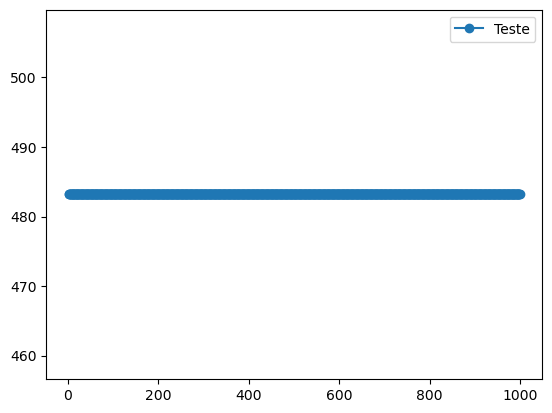

In [9]:
## Loop melhor parâmetro
values = [i for i in range( 2, 1000 )]
val_scores = list()

for i in values:
    model = Lasso(alpha = 1.0, max_iter= i) # alpha = 0 é uma regressão linear

    #fit
    model.fit(X_train, y_train) # quais são minhas características e quais são meus rótulos
    
    # classificação sobre a validação
    yhat_val = model.predict( X_test )
    
    #acc_val = mt.accuracy_score( y_test, yhat_val )
    r2 = mt.mean_squared_error(y_test, yhat_val)
    val_scores.append( r2 )

plt.plot( values, val_scores, '-o', label='Teste' )
plt.legend()
plt.show()

In [30]:
#model
model = Lasso(alpha = 1.0, max_iter= 1000)


#fit
model.fit(X_train, y_train)

#TESTE
#predict
yhat_train = model.predict(X_train)

#results
print(metrics(y_train,yhat_train))

#VALIDAÇÃO
#predict
yhat_val = model.predict(X_val)

#results
print(metrics(y_val,yhat_val))

#TESTE

#predict
yhat_test = model.predict(X_test)

#results
print(metrics(y_test,yhat_test))

[['R²:', 0.007], ['MSE:', 474.475], ['RMSE:', 21.782], ['MAE:', 17.305], ['MAPE:', 8.737]]
[['R²:', 0.008], ['MSE:', 473.747], ['RMSE:', 21.766], ['MAE:', 17.265], ['MAPE:', 8.696]]
[['R²:', 0.008], ['MSE:', 483.178], ['RMSE:', 21.981], ['MAE:', 17.473], ['MAPE:', 8.753]]


# Linear Regression Ridge

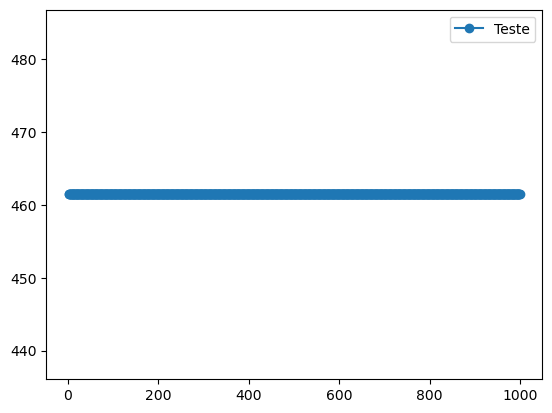

In [8]:
## Loop melhor parâmetro
values = [i for i in range( 2, 1000 )]
val_scores = list()

for i in values:
    model = Ridge(alpha = 1.0, max_iter= i) # alpha = 0 é uma regressão linear

    #fit
    model.fit(X_train, y_train) # quais são minhas características e quais são meus rótulos
    
    # classificação sobre a validação
    yhat_val = model.predict( X_test )
    
    #acc_val = mt.accuracy_score( y_test, yhat_val )
    r2 = mt.mean_squared_error(y_test, yhat_val)
    val_scores.append( r2 )

plt.plot( values, val_scores, '-o', label='Teste' )
plt.legend()
plt.show()

In [6]:
#model
model = Ridge(alpha = 1.0, max_iter= 1000)


#fit
model.fit(X_train, y_train)

#TESTE
#predict
yhat_train = model.predict(X_train)

#results
print(metrics(y_train,yhat_train))

#VALIDAÇÃO
#predict
yhat_val = model.predict(X_val)

#results
print(metrics(y_val,yhat_val))

#TESTE

#predict
yhat_test = model.predict(X_test)

#results
print(metrics(y_test,yhat_test))

[['R²:', 0.046], ['MSE:', 455.996], ['RMSE:', 21.354], ['MAE:', 16.998], ['MAPE:', 8.653]]
[['R²:', 0.04], ['MSE:', 458.445], ['RMSE:', 21.411], ['MAE:', 17.039], ['MAPE:', 8.682]]
[['R²:', 0.052], ['MSE:', 461.431], ['RMSE:', 21.481], ['MAE:', 17.13], ['MAPE:', 8.523]]


# Linear Regression Elastic Net

Junção da Lasso e Ridge parametro igual a 0.5 significa que irá ficar no meio dos dois códigos 

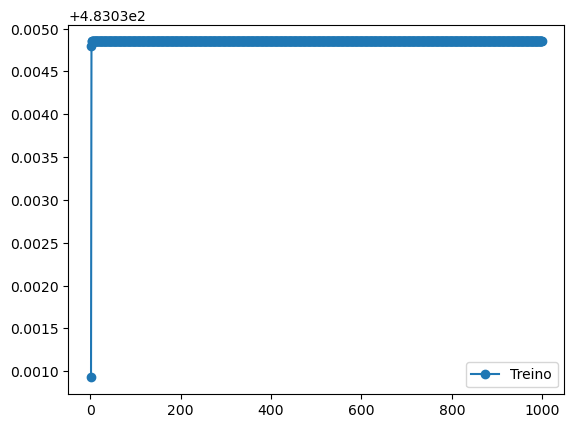

In [7]:
## Loop melhor parâmetro
values = [i for i in range( 2, 1000 )]
val_scores = list()

for i in values:
    model = ElasticNet(alpha = 1.0, l1_ratio = 0.5, max_iter= i) # alpha = 0 é uma regressão linear

    #fit
    model.fit(X_train, y_train) # quais são minhas características e quais são meus rótulos
    
    # classificação sobre a validação
    yhat_val = model.predict( X_test )
    
    #acc_val = mt.accuracy_score( y_test, yhat_val )
    r2 = mt.mean_squared_error(y_test, yhat_val)
    val_scores.append( r2 )

plt.plot( values, val_scores, '-o', label='Treino' )
plt.legend()
plt.show()

In [32]:
#model
model = ElasticNet(alpha = 1.0, l1_ratio = 0.5, max_iter= 1000)


#fit
model.fit(X_train, y_train)

#TESTE
#predict
yhat_train = model.predict(X_train)

#results
print(metrics(y_train,yhat_train))

#VALIDAÇÃO
#predict
yhat_val = model.predict(X_val)

#results
print(metrics(y_val,yhat_val))

#TESTE

#predict
yhat_test = model.predict(X_test)

#results
print(metrics(y_test,yhat_test))

[['R²:', 0.008], ['MSE:', 474.269], ['RMSE:', 21.778], ['MAE:', 17.3], ['MAPE:', 8.732]]
[['R²:', 0.008], ['MSE:', 473.636], ['RMSE:', 21.763], ['MAE:', 17.263], ['MAPE:', 8.694]]
[['R²:', 0.008], ['MSE:', 483.035], ['RMSE:', 21.978], ['MAE:', 17.47], ['MAPE:', 8.745]]


# Polinomial Regression


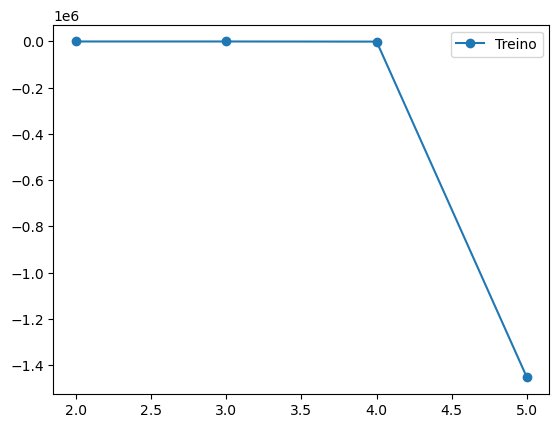

In [6]:
## Loop melhor parâmetro
values = [i for i in range( 2, 6 )]
val_scores = list()

for i in values:
    poly = PolynomialFeatures(degree=i)

    #model
    X_poly = poly.fit_transform(X_train)
    X_val_poly = poly.fit_transform(X_val)
    X_test_poly = poly.fit_transform(X_test)

    # model training
    model = LinearRegression()
    model.fit( X_poly, y_train )

    # predict
    yhat = model.predict( X_test_poly )
    
    #acc_val = mt.accuracy_score( y_test, yhat_val )
    r2 = mt.r2_score(y_test, yhat)
    val_scores.append( r2 )

plt.plot( values, val_scores, '-o', label='Treino' )
plt.legend()
plt.show()

In [7]:
poly = PolynomialFeatures(degree=2)

#model
X_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.fit_transform(X_test)

# model training
model = LinearRegression()
model.fit( X_poly, y_train )

# predict
yhat_train = model.predict( X_poly )
yhat_val = model.predict( X_val_poly )
yhat_test = model.predict( X_test_poly )

#results
print(metrics(y_train,yhat_train))
print(metrics(y_val,yhat_val))
print(metrics(y_test,yhat_test))




[['R²:', 0.094], ['MSE:', 432.986], ['RMSE:', 20.808], ['MAE:', 16.458], ['MAPE:', 8.351]]
[['R²:', 0.066], ['MSE:', 445.768], ['RMSE:', 21.113], ['MAE:', 16.75], ['MAPE:', 8.548]]
[['R²:', 0.09], ['MSE:', 443.041], ['RMSE:', 21.049], ['MAE:', 16.721], ['MAPE:', 8.242]]


# Polinomial Regression Lasso

C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.452e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


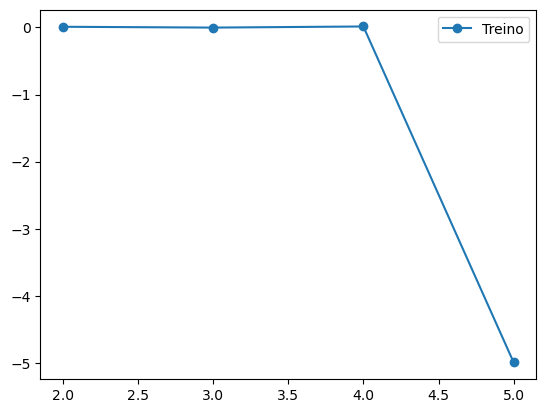

In [9]:
## Loop melhor parâmetro
values = [i for i in range( 2, 6 )]
val_scores = list()

for i in values:
    poly = PolynomialFeatures(degree=i)

    #model
    X_poly = poly.fit_transform(X_train)
    X_val_poly = poly.fit_transform(X_val)
    X_test_poly = poly.fit_transform(X_test)

    # model training
    model = Lasso(alpha = 1, max_iter = 1000)
    model.fit( X_poly, y_train )

    # predict
    yhat = model.predict( X_test_poly )
    
    #acc_val = mt.accuracy_score( y_test, yhat_val )
    r2 = mt.r2_score(y_test, yhat)
    val_scores.append( r2 )

plt.plot( values, val_scores, '-o', label='Treino' )
plt.legend()
plt.show()

In [12]:
poly = PolynomialFeatures(degree=2)

#model
X_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.fit_transform(X_test)

# model training
model = Lasso(alpha = 1, max_iter = 1000)
model.fit( X_poly, y_train )

# predict
yhat_train = model.predict( X_poly )
yhat_val = model.predict( X_val_poly )
yhat_test = model.predict( X_test_poly )

#results
print(metrics(y_train,yhat_train))
print(metrics(y_val,yhat_val))
print(metrics(y_test,yhat_test))

[['R²:', 0.009], ['MSE:', 473.639], ['RMSE:', 21.763], ['MAE:', 17.285], ['MAPE:', 8.7]]
[['R²:', 0.01], ['MSE:', 472.913], ['RMSE:', 21.747], ['MAE:', 17.238], ['MAPE:', 8.682]]
[['R²:', 0.008], ['MSE:', 482.824], ['RMSE:', 21.973], ['MAE:', 17.457], ['MAPE:', 8.756]]


#  Polinomial Regression Ridge

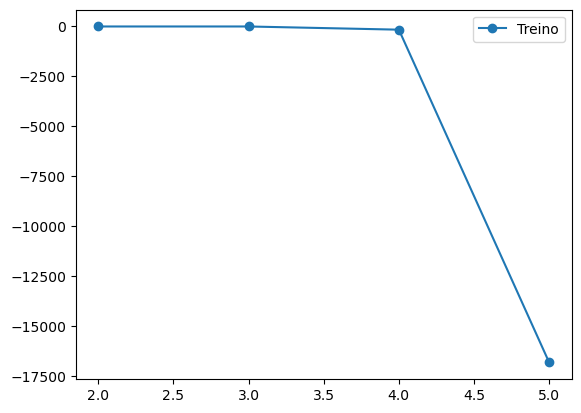

In [15]:
## Loop melhor parâmetro
values = [i for i in range( 2, 6 )]
val_scores = list()

for i in values:
    poly = PolynomialFeatures(degree=i)

    #model
    X_poly = poly.fit_transform(X_train)
    X_val_poly = poly.fit_transform(X_val)
    X_test_poly = poly.fit_transform(X_test)

    # model training
    model = Ridge(alpha = 1, max_iter = 1000)
    model.fit( X_poly, y_train )

    # predict
    yhat = model.predict( X_test_poly )
    
    #acc_val = mt.accuracy_score( y_test, yhat_val )
    r2 = mt.r2_score(y_test, yhat)
    val_scores.append( r2 )

plt.plot( values, val_scores, '-o', label='Treino' )
plt.legend()
plt.show()

In [13]:
poly = PolynomialFeatures(degree=2)

#model
X_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.fit_transform(X_test)

# model training
model = Ridge(alpha = 1, max_iter = 1000)
model.fit( X_poly, y_train )

# predict
yhat_train = model.predict( X_poly )
yhat_val = model.predict( X_val_poly )
yhat_test = model.predict( X_test_poly )

#results
print(metrics(y_train,yhat_train))
print(metrics(y_val,yhat_val))
print(metrics(y_test,yhat_test))

[['R²:', 0.093], ['MSE:', 433.475], ['RMSE:', 20.82], ['MAE:', 16.472], ['MAPE:', 8.373]]
[['R²:', 0.068], ['MSE:', 445.184], ['RMSE:', 21.099], ['MAE:', 16.739], ['MAPE:', 8.569]]
[['R²:', 0.089], ['MSE:', 443.485], ['RMSE:', 21.059], ['MAE:', 16.729], ['MAPE:', 8.289]]


 # Polinomial Regression Elastic Net


C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.189e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


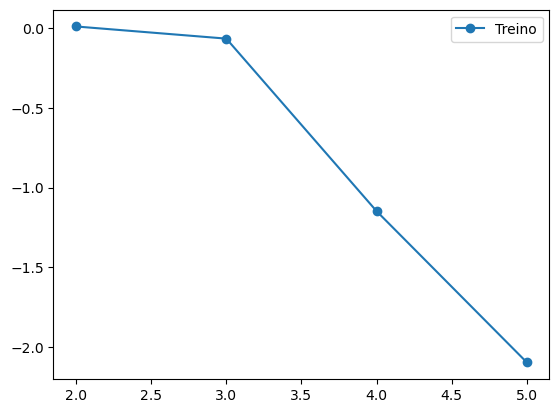

In [16]:
## Loop melhor parâmetro
values = [i for i in range( 2, 6 )]
val_scores = list()

for i in values:
    poly = PolynomialFeatures(degree=i)

    #model
    X_poly = poly.fit_transform(X_train)
    X_val_poly = poly.fit_transform(X_val)
    X_test_poly = poly.fit_transform(X_test)

    # model training
    model = ElasticNet(alpha = 1, max_iter = 1000)
    model.fit( X_poly, y_train )

    # predict
    yhat = model.predict( X_test_poly )
    
    #acc_val = mt.accuracy_score( y_test, yhat_val )
    r2 = mt.r2_score(y_test, yhat)
    val_scores.append( r2 )

plt.plot( values, val_scores, '-o', label='Treino' )
plt.legend()
plt.show()

In [14]:
poly = PolynomialFeatures(degree=2)

#model
X_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.fit_transform(X_test)

# model training
model = ElasticNet(alpha = 1, max_iter = 1000)
model.fit( X_poly, y_train )

# predict
yhat_train = model.predict( X_poly )
yhat_val = model.predict( X_val_poly )
yhat_test = model.predict( X_test_poly )

#results
print(metrics(y_train,yhat_train))
print(metrics(y_val,yhat_val))
print(metrics(y_test,yhat_test))

[['R²:', 0.013], ['MSE:', 471.878], ['RMSE:', 21.723], ['MAE:', 17.244], ['MAPE:', 8.679]]
[['R²:', 0.013], ['MSE:', 471.408], ['RMSE:', 21.712], ['MAE:', 17.2], ['MAPE:', 8.675]]
[['R²:', 0.011], ['MSE:', 481.695], ['RMSE:', 21.948], ['MAE:', 17.426], ['MAPE:', 8.751]]


# Decision Tree Regressor

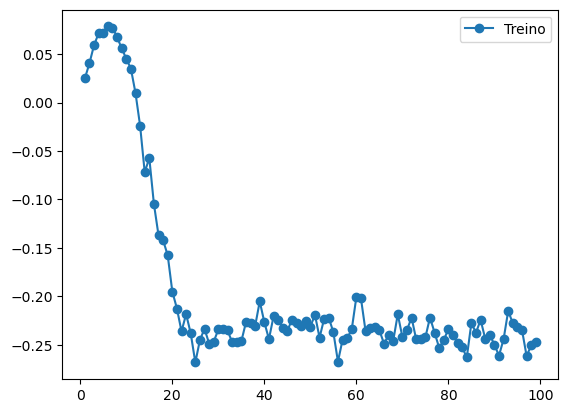

In [19]:
## Loop melhor parâmetro
values = [i for i in range( 1, 100 )]
val_scores = list()

for i in values:
    # Criar um modelo de árvore de decisão
    model = DecisionTreeRegressor(max_depth = i)

    # Treinar o modelo com os dados de treinamento
    model.fit(X_train, y_train)

    # Fazer previsões nos dados de teste
    yhat_test = model.predict(X_test)
    
    #acc_val = mt.accuracy_score( y_test, yhat_val )
    r2 = mt.r2_score(y_test, yhat_test)
    val_scores.append( r2 )

plt.plot( values, val_scores, '-o', label='Treino' )
plt.legend()
plt.show()

In [18]:
# Criar um modelo de árvore de decisão
model = DecisionTreeRegressor()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
yhat_train = model.predict(X_train)
yhat_val = model.predict(X_val)
yhat_test = model.predict(X_test)

print(metrics(y_train,yhat_train))
print(metrics(y_val,yhat_val))
print(metrics(y_test,yhat_test))

[['R²:', 0.992], ['MSE:', 3.94], ['RMSE:', 1.985], ['MAE:', 0.214], ['MAPE:', 0.083]]
[['R²:', -0.272], ['MSE:', 607.283], ['RMSE:', 24.643], ['MAE:', 16.991], ['MAPE:', 6.789]]
[['R²:', -0.209], ['MSE:', 588.813], ['RMSE:', 24.265], ['MAE:', 16.713], ['MAPE:', 6.433]]


# Random Forest Regressor

C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

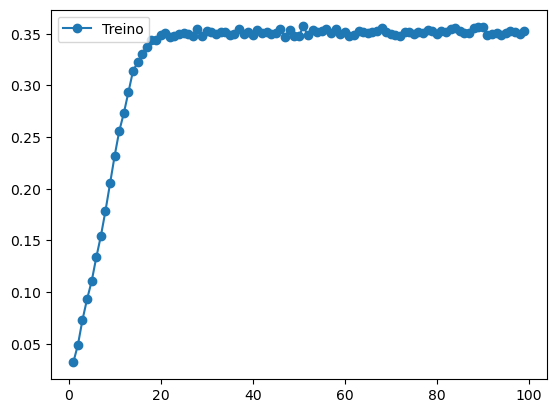

In [20]:
## Loop melhor parâmetro
values = [i for i in range( 1, 100 )]
val_scores = list()

for i in values:
    # Criar um modelo de árvore de decisão
    model = RandomForestRegressor(n_estimators=100, max_depth = i)

    # Treinar o modelo com os dados de treinamento
    model.fit(X_train, y_train)

    # Fazer previsões nos dados de teste
    yhat_test = model.predict(X_test)
    
    #acc_val = mt.accuracy_score( y_test, yhat_val )
    r2 = mt.r2_score(y_test, yhat_test)
    val_scores.append( r2 )

plt.plot( values, val_scores, '-o', label='Treino' )
plt.legend()
plt.show()

In [30]:
import numpy as np

# Criar um modelo Random Forest
model = RandomForestRegressor(n_estimators=100, max_depth=100)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
yhat_train = model.predict(X_train)
yhat_val = model.predict(X_val)
yhat_test = model.predict(X_test)

print(metrics(y_train,yhat_train))
print(metrics(y_val,yhat_val))
print(metrics(y_test,yhat_test))

C:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[['R²:', 0.903], ['MSE:', 46.452], ['RMSE:', 6.816], ['MAE:', 4.865], ['MAPE:', 2.627]]
[['R²:', 0.337], ['MSE:', 316.779], ['RMSE:', 17.798], ['MAE:', 12.992], ['MAPE:', 7.073]]
[['R²:', 0.352], ['MSE:', 315.526], ['RMSE:', 17.763], ['MAE:', 13.025], ['MAPE:', 6.684]]
